<a href="https://colab.research.google.com/github/CroxxN/learning_ml/blob/main/ReCaptcha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://github.com/brian-the-dev/recaptcha-dataset/archive/refs/heads/main.zip

--2022-10-23 16:17:45--  https://github.com/brian-the-dev/recaptcha-dataset/archive/refs/heads/main.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/brian-the-dev/recaptcha-dataset/zip/refs/heads/main [following]
--2022-10-23 16:17:45--  https://codeload.github.com/brian-the-dev/recaptcha-dataset/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 20.205.243.165
Connecting to codeload.github.com (codeload.github.com)|20.205.243.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [       <=>          ] 399.26M  17.5MB/s    in 25s     

2022-10-23 16:18:11 (15.8 MB/s) - ‘main.zip’ saved [418651036]



In [ ]:
!unzip /content/main.zip

In [40]:
dir = '/content/recaptcha-dataset-main/Large'
image_size = (120,120)

In [6]:
from PIL import Image

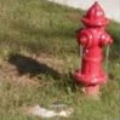

In [92]:
from matplotlib import image

img = Image.open('/content/recaptcha-dataset-main/Large/Hydrant/Hydrant (12).png')
img = img.convert('RGB')
img

In [93]:
img = np.asarray(img)
img.shape

(120, 120, 3)

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [85]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip = True,
    validation_split=0.2
)
train_ds = generator.flow_from_directory(
    dir,
    subset = "training",
    target_size = (120,120),
    batch_size = 16,
    class_mode = 'categorical'

)

test_ds = generator.flow_from_directory(
    dir,
    subset = "validation",
    target_size = (120,120),
    batch_size = 16,
    class_mode = 'categorical'
)

Found 9424 images belonging to 13 classes.
Found 2350 images belonging to 13 classes.


In [49]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape= (120, 120, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), padding="same",activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), padding="same",activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(13, activation="softmax")
])

In [47]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 59, 59, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 28, 28, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 14, 14, 64)      

In [52]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(
    train_ds,
    validation_data = test_ds,
    epochs=20
)

In [94]:



imar = np.expand_dims(img, axis=0)
imarray = imar/ 255.0

model.predict(imar)

1/1 [==============================] - 0s 18ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [95]:
model.save("/content/drive/Shareddrives/Class/captcha.h5")